In [1]:
from scipy.ndimage import correlate
import numpy as np
from skimage import color, io, measure, img_as_ubyte, img_as_float
import matplotlib.pyplot as plt
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import matrix_transform
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl

In [2]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

In [3]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "NusaPenida.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

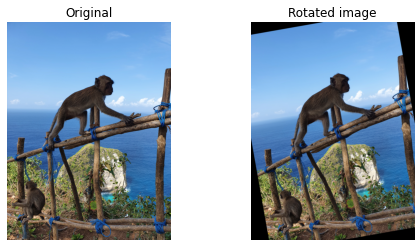

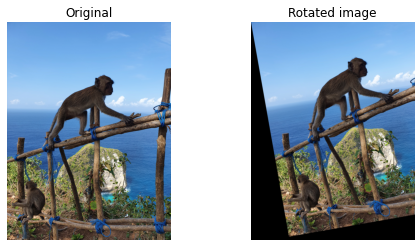

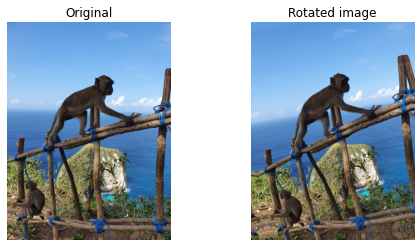

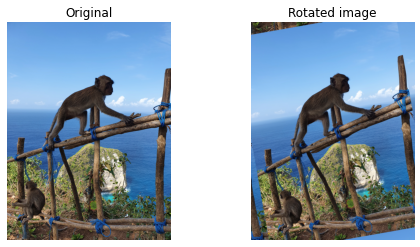

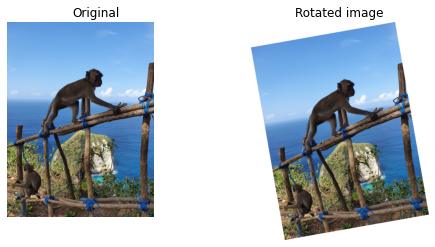

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


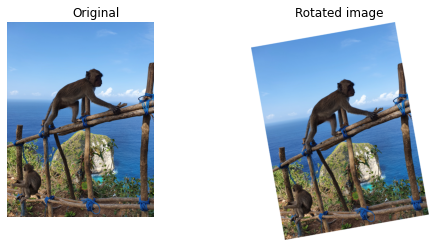

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


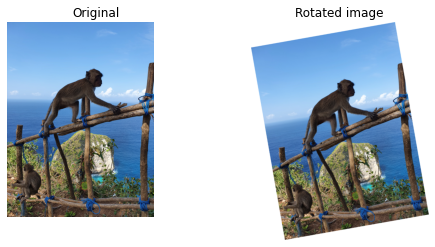

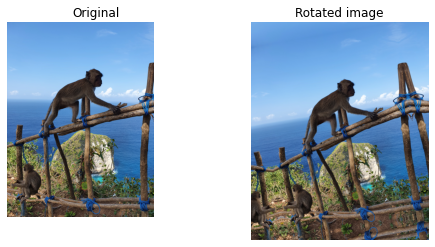

In [4]:
# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
rot_center = [0, 0]
rotated_img_1 = rotate(im_org, rotation_angle, center=rot_center)
rotated_img_2 = rotate(im_org, rotation_angle, mode="reflect")
rotated_img_3 = rotate(im_org, rotation_angle, mode="wrap")
rotated_img_4 = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=1)
rotated_img_5 = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=2)
rotated_img_6 = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=3)
rotated_img_7 = rotate(im_org, rotation_angle, resize=True, mode="reflect")
show_comparison(im_org, rotated_img, "Rotated image")
show_comparison(im_org, rotated_img_1, "Rotated image")
show_comparison(im_org, rotated_img_2, "Rotated image")
show_comparison(im_org, rotated_img_3, "Rotated image")
show_comparison(im_org, rotated_img_4, "Rotated image")
show_comparison(im_org, rotated_img_5, "Rotated image")
show_comparison(im_org, rotated_img_6, "Rotated image")
show_comparison(im_org, rotated_img_7, "Rotated image")

In [5]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


In [6]:
transformed_img = warp(im_org, tform)

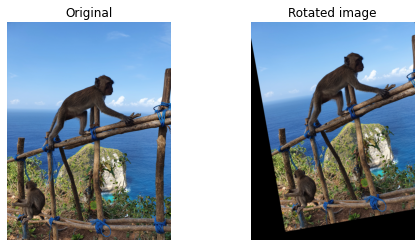

In [7]:
show_comparison(im_org, transformed_img, "Rotated image")

In [8]:
transformed_img = warp(im_org, tform.inverse)

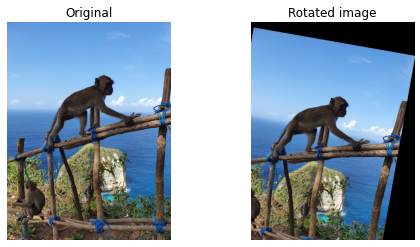

In [9]:
show_comparison(im_org, transformed_img, "Rotated image")

[[ 0.98480775 -0.17364818  0.        ]
 [ 0.17364818  0.98480775  0.        ]
 [ 0.          0.          1.        ]]


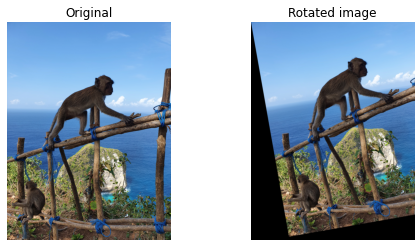

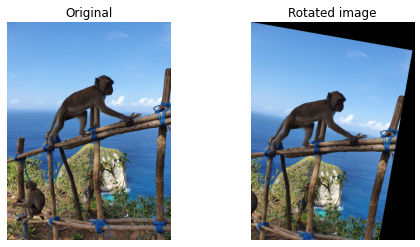

In [10]:
rotation_angle = 10.0 * math.pi / 180.
tform = EuclideanTransform(rotation=rotation_angle)
print(tform.params)
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Rotated image")
transformed_img = warp(im_org, tform.inverse)
show_comparison(im_org, transformed_img, "Rotated image")

In [11]:
rotation_angle = 15.0 * math.pi / 180.
sform = SimilarityTransform(scale=0.6, rotation=rotation_angle, translation=[40,30])
print(sform.params)

[[ 0.5795555  -0.15529143 40.        ]
 [ 0.15529143  0.5795555  30.        ]
 [ 0.          0.          1.        ]]


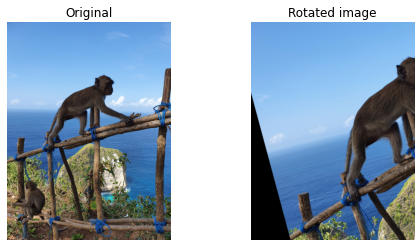

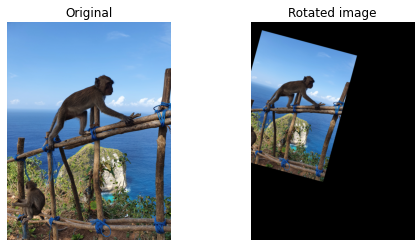

In [12]:
transformed_img = warp(im_org, sform)
transformed_img_1 = warp(im_org, sform.inverse)
show_comparison(im_org, transformed_img, "Rotated image")
show_comparison(im_org, transformed_img_1, "Rotated image")

In [13]:
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)

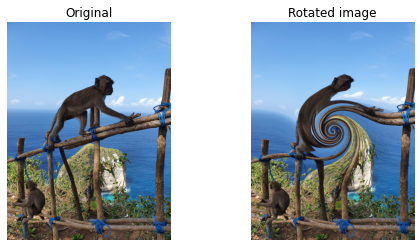

In [14]:
show_comparison(im_org, swirl_img, "Rotated image")

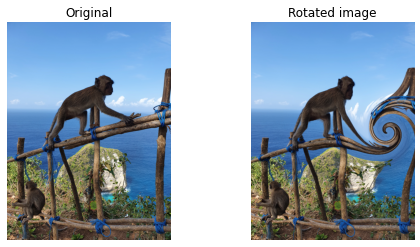

In [15]:
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
show_comparison(im_org, swirl_img, "Rotated image")

In [16]:
src_img = io.imread(in_dir + 'Hand1.jpeg')
dst_img = io.imread(in_dir + 'Hand2.jpeg')

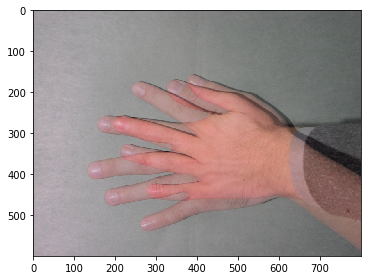

In [17]:
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

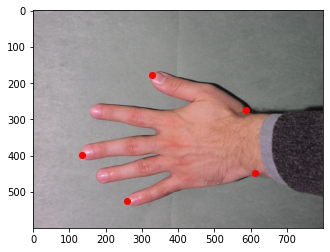

In [18]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])
plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

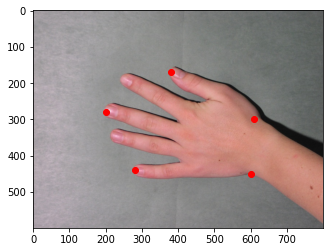

In [19]:
dst = np.array([[610, 300], [380, 170], [200, 280], [280, 440], [600, 450]])
plt.imshow(dst_img)
plt.plot(dst[:, 0], dst[:, 1], '.r', markersize=12)
plt.show()

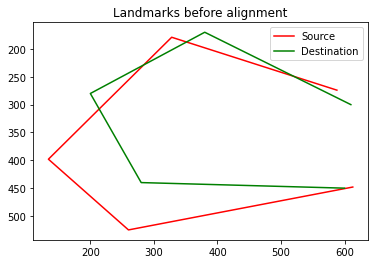

In [20]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [21]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 30023


In [22]:
tform = EuclideanTransform()
tform.estimate(src, dst)

True

In [23]:
src_transform = matrix_transform(src, tform.params)

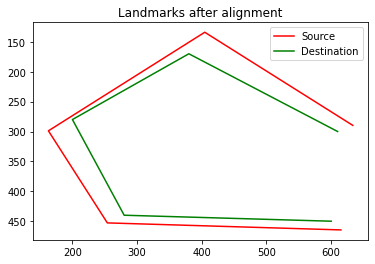

In [24]:
fig, ax = plt.subplots()
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks after alignment")
plt.show()

In [25]:
e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 5569.528014237756


In [26]:
warped = warp(src_img, tform.inverse)
warped_1 = warp(src_img, tform)

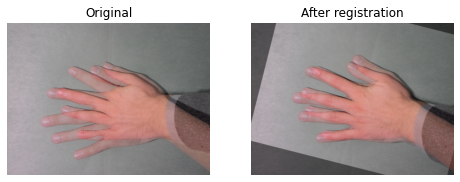

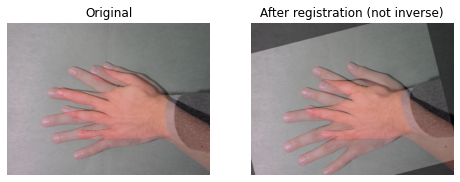

In [27]:
blend_1 = 0.5 * img_as_float(warped) + 0.5 * img_as_float(dst_img)
blend_2 = 0.5 * img_as_float(warped_1) + 0.5 * img_as_float(dst_img)
show_comparison(blend, blend_1, "After registration")
show_comparison(blend, blend_2, "After registration (not inverse)")